# Long-term movement monitoring database
## Here is how I work with this data

Using the Waveform Data Base (wfdb) library, I load and work with the Physionet Long-term Movement Monitoring (LTMM) data as follows.

In [40]:
import pickle
import os

def save_results(d, fname = "physionet_results.pik"):
    fname = os.path.abspath("../../data/%s" % fname)
    with open(fname, 'wb') as handle:
        pickle.dump(d, handle, protocol=pickle.HIGHEST_PROTOCOL)
    return

def load_results(fname = "physionet_results.pik"):
    fname = os.path.abspath("../../data/%s" % fname)
    with open(fname, 'rb') as handle:
        d = pickle.load(handle)
    return d


In [4]:
d = load_results()

In [7]:
import wfdb
dbs = wfdb.io.get_record_list('ltmm')

In [13]:
df = {}
for key in d:
    df[dbs[key]] = d[key]

In [39]:
save_results(df, fname = "physionet_results_by_name.pik")

In [18]:
df[dbs[10]][:,3]

array([0.38717869, 0.30476221, 0.28212836, ..., 0.24941163, 0.06270607,
       0.00530806])

In [26]:
len(df[dbs[10]][df[dbs[10]][:,1] < 0.8])

1313

In [31]:
import numpy as np
thresholds = np.arange(0.25,1,0.05)
N_stumble = {}
N_fall = {}
N_nons = {}


def N_key(s,t):
    return s,"%4.2f"%t

z

In [35]:
NS = {}
for thresh in thresholds:
    _NC = []
    _NF = []
    for i in range(0,71):
        if dbs[i][0] == 'C':
            _Nn = len(N_nons[N_key(dbs[i],thresh)][N_nons[N_key(dbs[i],thresh)]])
            _NC.append(_Nn)
        elif dbs[i][0] == 'F':
            _Nn = len(N_nons[N_key(dbs[i],thresh)][N_nons[N_key(dbs[i],thresh)]])
            _NF.append(_Nn)
    NS[N_key('C',thresh)] = np.array(_NC)
    NS[N_key('F',thresh)] = np.array(_NF)

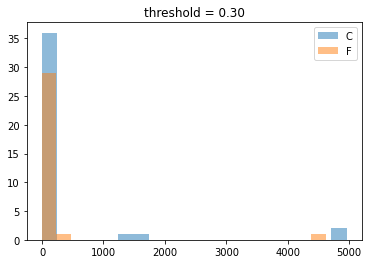

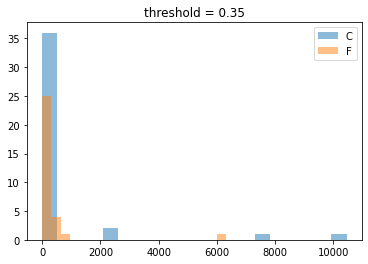

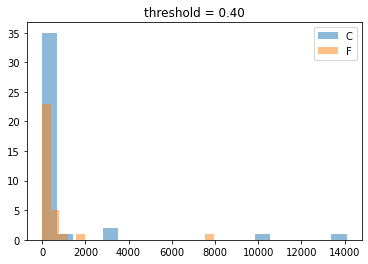

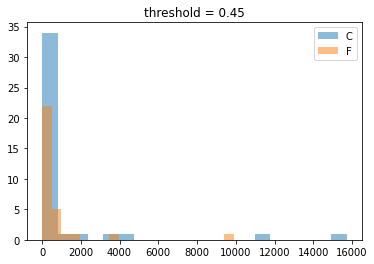

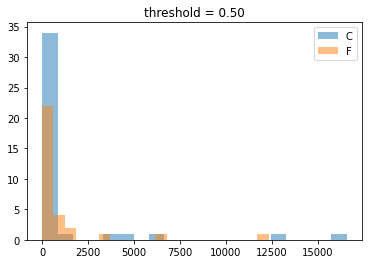

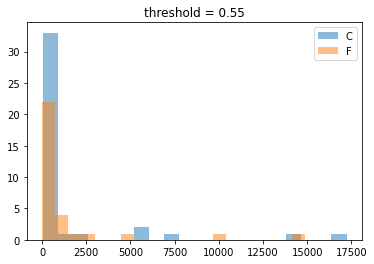

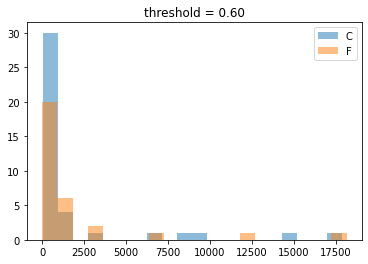

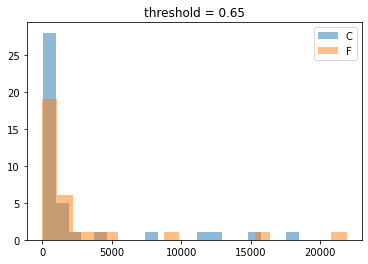

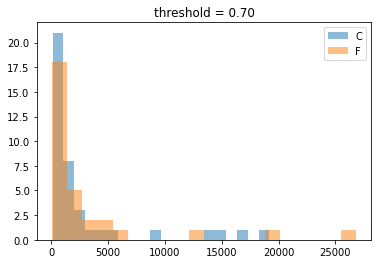

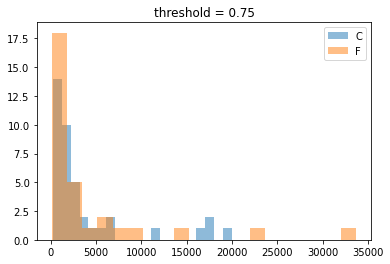

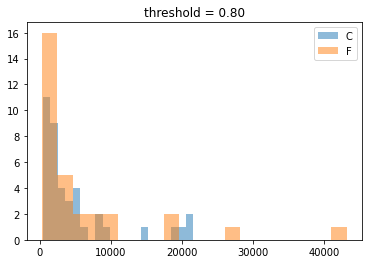

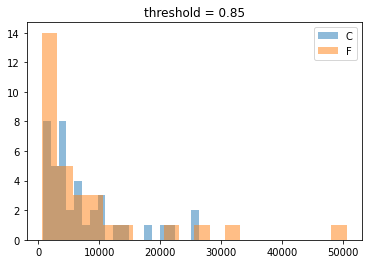

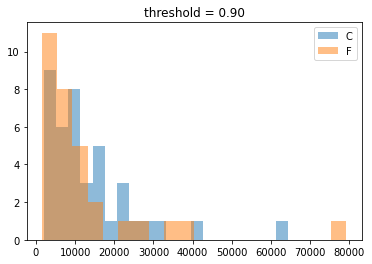

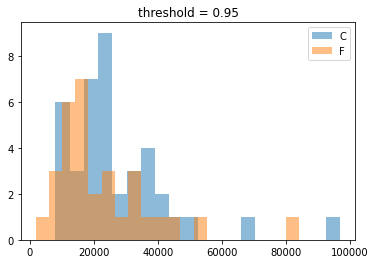

In [37]:
import matplotlib.pyplot as plt

n_range = None
n_bins = 20

for thresh in thresholds:
    if thresh > thresholds[0]:
        plt.title("threshold = %4.2f" % thresh)
        plt.hist(NS[N_key('C',thresh)], range=n_range, bins=n_bins, alpha=0.5, label='C')
        plt.hist(NS[N_key('F',thresh)], range=n_range, bins=n_bins, alpha=0.5, label='F')
        plt.legend()
        plt.show()

In [41]:
df

{'CO001': array([[0.00000000e+00, 9.06946421e-01, 5.32762185e-02, 3.97773385e-02],
        [7.11237553e-04, 9.19004023e-01, 4.62583527e-02, 3.47376168e-02],
        [1.42247511e-03, 9.18897390e-01, 4.63188887e-02, 3.47836725e-02],
        ...,
        [7.19978663e+01, 9.86933589e-01, 7.74577307e-03, 5.32062771e-03],
        [7.19985775e+01, 9.86753285e-01, 7.88808800e-03, 5.35862008e-03],
        [7.19992888e+01, 9.86991107e-01, 7.69687910e-03, 5.31201903e-03]]),
 'CO002': array([[0.00000000e+00, 4.32072192e-01, 3.68196309e-01, 1.99731573e-01],
        [7.11237553e-04, 9.41650510e-01, 3.31511199e-02, 2.51982808e-02],
        [1.42247511e-03, 9.38763678e-01, 3.20565961e-02, 2.91798320e-02],
        ...,
        [7.19978663e+01, 9.72938538e-01, 1.49113415e-02, 1.21501153e-02],
        [7.19985775e+01, 9.24009264e-01, 3.31733860e-02, 4.28173244e-02],
        [7.19992888e+01, 9.40725386e-01, 2.94668991e-02, 2.98078284e-02]]),
 'CO003': array([[0.00000000e+00, 6.00203991e-01, 2.12182343e-01

In [45]:
import pandas as pd
list(df.keys())

['CO001',
 'CO002',
 'CO003',
 'CO004',
 'CO005',
 'CO006',
 'CO007',
 'CO008',
 'CO009',
 'CO010',
 'CO011',
 'CO012',
 'CO013',
 'CO014',
 'CO015',
 'CO016',
 'CO017',
 'CO018',
 'CO019',
 'CO020',
 'CO021',
 'CO022',
 'CO023',
 'CO024',
 'CO025',
 'CO027',
 'CO028',
 'CO029',
 'CO030',
 'CO031',
 'CO032',
 'CO035',
 'CO036',
 'CO037',
 'CO038',
 'CO039',
 'CO040',
 'CO041',
 'CO042',
 'CO044',
 'FL001',
 'FL004',
 'FL005',
 'FL006',
 'FL007',
 'FL008',
 'FL009',
 'FL010',
 'FL011',
 'FL014',
 'FL015',
 'FL016',
 'FL018',
 'FL019',
 'FL020',
 'FL021',
 'FL022',
 'FL023',
 'FL024',
 'FL025',
 'FL026',
 'FL027',
 'FL028',
 'FL029',
 'FL030',
 'FL031',
 'FL032',
 'FL033',
 'FL034',
 'FL035',
 'FL036']